In [1]:
import cv2 as cv
import numpy as np
import imutils
from matplotlib import pyplot as plt

## Exercício:

* Abra a imagem figs/messi5.jpg
* Recorte a bola
* Copie em outra parte da imagem
* Rotacione a imagem em 60 graus
* Altere o tamanho da imagem mantendo a proporção


## Leitura da imagem

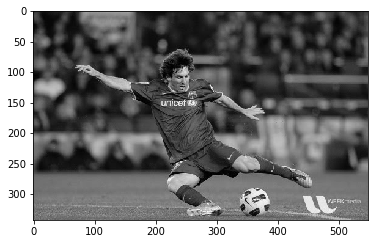

In [2]:
img = cv.imread("./../../figs/messi5.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray');

## Recorte a bola e copie para outra parte da imagem

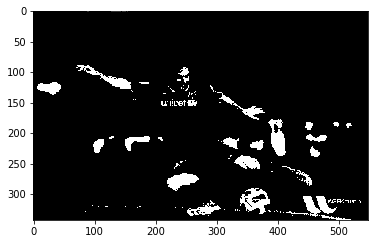

In [3]:
# Thresholding
ret,th = cv.threshold(gray,160,255,cv.THRESH_BINARY)
plt.imshow(th, cmap = 'gray');

In [4]:
# Shape detection using contour approximation
c = []
contours,_ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv.approxPolyDP(cnt, 0.01*cv.arcLength(cnt,True), True)
    if len(approx) > 8:
        c.append(cnt)

# Seleciona elemento de maior área
c = max(c,key = cv.contourArea) if len(c)>0 else max(contours,key=cv.contourArea)
(x,y),radius = cv.minEnclosingCircle(c)

print(x,y,radius)
x = int(x)
y = int(y)
radius = int(radius)

362.0 312.5 24.4183292388916


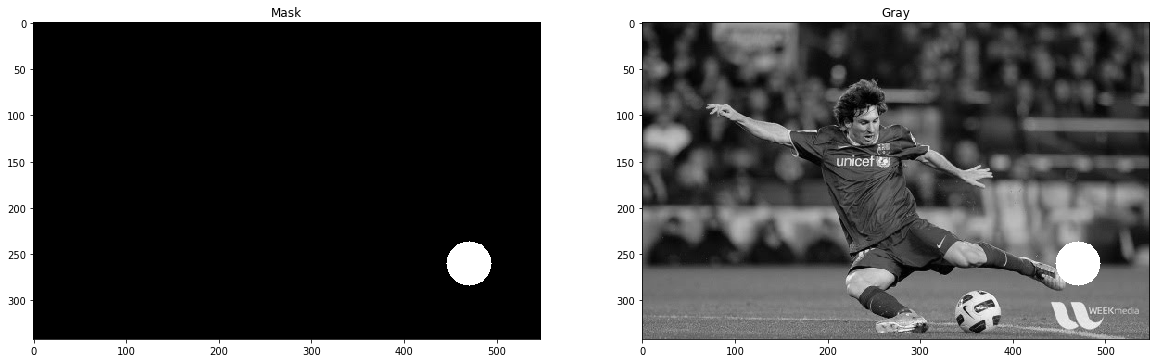

In [5]:
# Cria máscara com área selecionada e aplica à imagem 
mask = np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
cv.circle(mask,(470,260),radius, (255,255,255),-1)
img2 = cv.bitwise_or(gray,mask)

fig, (ax1,ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.title.set_text("Mask")
ax1.imshow(mask, cmap='gray')
ax2.title.set_text("Gray")
ax2.imshow(img2, cmap='gray')
plt.show()

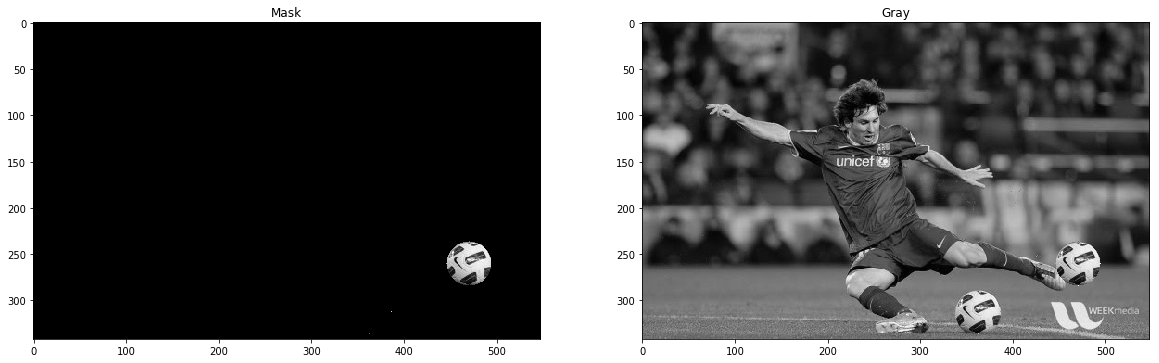

In [6]:
# Cria máscara com a bola e soma à imagem 
ball = np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
cv.circle(ball,(x,y),radius, (255,255,255),-1)
ball = cv.bitwise_or(gray,gray, mask=ball)
ball[260-radius:260+radius,470-radius:470+radius] = ball[y-radius:y+radius,x-radius:x+radius]
ball[y-radius:y+radius,x-radius:x+radius]= 0
img2 += ball

fig, (ax1,ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.title.set_text("Mask")
ax1.imshow(ball, cmap='gray')
ax2.title.set_text("Gray")
ax2.imshow(img2, cmap='gray')
plt.show()

### Rotação imagem 60 graus

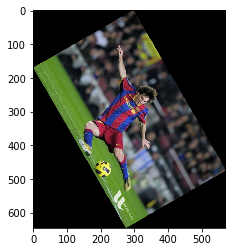

In [8]:
rot_img = imutils.rotate_bound(img, 60)
rot_img = cv.cvtColor(rot_img, cv.COLOR_BGR2RGB)
plt.imshow(rot_img);

### Reshape mantendo a proporção

Antes :  (342, 548, 3)
Depois:  (102, 164, 3)


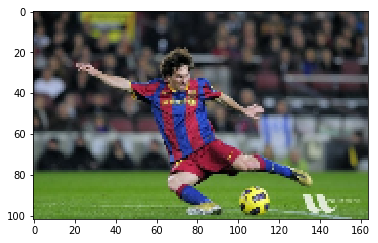

In [9]:
shape = img.shape
scale_percent = 30

w = int(shape[1]*scale_percent / 100)
h = int(shape[0]*scale_percent / 100)

# resize image
resized = cv.resize(img, (w,h))
print('Antes : ',img.shape)
print('Depois: ',resized.shape)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB));